Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

Load the Dataset

In [ ]:
matches = pd.read_csv('/content/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
print(matches.shape)
print(" -------------------- ")
print(matches.isnull().sum())
print(" -------------------- ")
print(matches.info())

(950, 20)
 -------------------- 
ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object

In [ ]:
matches[matches['WinningTeam'].isna()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
205,1178424,Bengaluru,2019-04-30,2019,49,Royal Challengers Bangalore,Rajasthan Royals,M.Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'AB de Villiers', 'MP Stoinis', 'H...","['SV Samson', 'LS Livingstone', 'AM Rahane', '...",NJ Llong,UV Gandhe
437,829813,Bangalore,2015-05-17,2015,55,Royal Challengers Bangalore,Delhi Daredevils,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['V Kohli', 'CH Gayle', 'AB de Villiers', 'Man...","['Q de Kock', 'SS Iyer', 'JP Duminy', 'Yuvraj ...",HDPK Dharmasena,K Srinivasan
464,829763,Bangalore,2015-04-29,2015,29,Royal Challengers Bangalore,Rajasthan Royals,M Chinnaswamy Stadium,Rajasthan Royals,field,NaN,NaN,NoResults,NaN,NaN,NaN,"['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...","['AM Rahane', 'SR Watson', 'SPD Smith', 'KK Na...",JD Cloete,PG Pathak
708,501265,Delhi,2011-05-21,2011,68,Delhi Daredevils,Pune Warriors,Feroz Shah Kotla,Delhi Daredevils,bat,NaN,NaN,NoResults,NaN,NaN,NaN,"['NV Ojha', 'DA Warner', 'MS Wade', 'CA Ingram...","['MK Pandey', 'JP Faulkner', 'SC Ganguly', 'RV...",SS Hazare,RJ Tucker


In [ ]:
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()

matches.head()

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
matches[matches['Season']=='2020/21'].head(2)

,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
134,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,2020-11-08,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi


Data Pre-Processing & Feature selection

    ▪ Data Cleaning

    ▪ Filling Missing values

    ▪ Noisy Data

    ▪ Removal of outliners

    ▪ Transforming categorical variables into numerical variables (or vice versa)

In [ ]:
# Convert the Date columns into their respective data types
matches['Date'] = pd.to_datetime(matches['Date'])
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

matches.drop('Season',axis=1, inplace=True)
matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [ ]:
matches['WinningTeam'].unique()

array(['Gujarat Titans', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Punjab Kings', 'Mumbai Indians',
       'Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Chennai Super Kings', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

matches.head()

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022
2,2022-05-25,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,2022,2022
3,2022-05-24,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,2022,2022
4,2022-05-22,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,2022,2022


In [ ]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
print(balls.shape)
print(" -------------------- ")
print(balls.isnull().sum())
print(" -------------------- ")
print(balls.info())

(58722, 17)
 -------------------- 
ID                       0
innings                  0
overs                    0
ballnumber               0
batter                   0
bowler                   1
non-striker              1
extra_type           55678
batsman_run              1
extras_run               1
total_run                1
non_boundary             1
isWicketDelivery         1
player_out           55846
kind                 55846
fielders_involved    56655
BattingTeam              1
dtype: int64
 -------------------- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58722 entries, 0 to 58721
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58722 non-null  int64  
 1   innings            58722 non-null  int64  
 2   overs              58722 non-null  int64  
 3   ballnumber         58722 non-null  int64  
 4   batter             58722 non-null  object 
 5   bowler             5

In [ ]:
batgroup = balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ballnumber'].count()).rename(columns={'ballnumber':'Balls_Faced'})
batsman_Stats.head()

,Balls_Faced
batter,
A Badoni,139
A Manohar,79
A Mishra,26
A Nortje,13
A Tomar,8


In [ ]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

,Balls_Faced,innings
batter,,
A Badoni,139,2
A Manohar,79,2
A Mishra,26,2
A Nortje,13,2
A Tomar,8,1


In [ ]:
batsman_Stats['runs']=batgroup['batsman_run'].sum()
batsman_Stats.head()

,Balls_Faced,innings,runs
batter,,,
A Badoni,139,2,161.0
A Manohar,79,2,108.0
A Mishra,26,2,21.0
A Nortje,13,2,8.0
A Tomar,8,1,4.0


In [ ]:
batsman_Stats['0s'] = balls[balls['batsman_run'] == 0].groupby('batter')['batsman_run'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s
batter,,,,
A Badoni,139,2,161.0,57.0
A Manohar,79,2,108.0,30.0
A Mishra,26,2,21.0,13.0
A Nortje,13,2,8.0,9.0
A Tomar,8,1,4.0,7.0


In [ ]:
batsman_Stats['1s'] = balls[balls['batsman_run'] == 1].groupby('batter')['batsman_run'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = balls[balls['batsman_run'] == 2].groupby('batter')['batsman_run'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = balls[balls['batsman_run'] == 3].groupby('batter')['batsman_run'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = balls[balls['batsman_run'] == 4].groupby('batter')['batsman_run'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = balls[balls['batsman_run'] == 6].groupby('batter')['batsman_run'].count()
batsman_Stats['6s'].fillna(0,inplace=True)

batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Badoni,139,2,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9
A Manohar,79,2,108.0,30.0,30.0,2.0,0.0,14.0,3.0,6
A Mishra,26,2,21.0,13.0,9.0,2.0,0.0,2.0,0.0,2
A Nortje,13,2,8.0,9.0,2.0,0.0,2.0,0.0,0.0,1
A Tomar,8,1,4.0,7.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
batsman_Stats['player_out']=batgroup['player_out'].count()
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out
batter,,,,,,,,,,
A Badoni,139,2,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9
A Manohar,79,2,108.0,30.0,30.0,2.0,0.0,14.0,3.0,6
A Mishra,26,2,21.0,13.0,9.0,2.0,0.0,2.0,0.0,2
A Nortje,13,2,8.0,9.0,2.0,0.0,2.0,0.0,0.0,1
A Tomar,8,1,4.0,7.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike
batter,,,,,,,,,,,,
A Badoni,139,2,161.0,57.0,53.0,11.0,0.0,11.0,7.0,9,17.89,115.83
A Manohar,79,2,108.0,30.0,30.0,2.0,0.0,14.0,3.0,6,18.00,136.71
A Mishra,26,2,21.0,13.0,9.0,2.0,0.0,2.0,0.0,2,10.50,80.77
A Nortje,13,2,8.0,9.0,2.0,0.0,2.0,0.0,0.0,1,8.00,61.54
A Tomar,8,1,4.0,7.0,0.0,0.0,0.0,1.0,0.0,1,4.00,50.00


from matplotlib import pyplot as plt
_df_21['Balls_Faced'].plot(kind='hist', bins=20, title='Balls_Faced')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22['innings'].plot(kind='hist', bins=20, title='innings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['runs'].plot(kind='hist', bins=20, title='runs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['0s'].plot(kind='hist', bins=20, title='0s')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('batter').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26.plot(kind='scatter', x='Balls_Faced', y='innings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27.plot(kind='scatter', x='innings', y='runs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='runs', y='0s', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='0s', y='1s', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['Balls_Faced'].plot(kind='line', figsize=(8, 4), title='Balls_Faced')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['innings'].plot(kind='line', figsize=(8, 4), title='innings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_32['runs'].plot(kind='line', figsize=(8, 4), title='runs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['0s'].plot(kind='line', figsize=(8, 4), title='0s')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_34['batter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_34, x='Balls_Faced', y='batter', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_35['batter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_35, x='innings', y='batter', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['batter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='runs', y='batter', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_37['batter'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_37, x='0s', y='batter', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
bowlgroup = balls.groupby(['bowler'])
bowler_Stats = pd.DataFrame(bowlgroup['ballnumber'].count()).rename(columns={'ballnumber':'BallsThrow'})
balls['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [ ]:
# Get only useful Wicket and Outs
wickets_out = balls[balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ballnumber'].count()
bowler_Stats.head()

,BallsThrow,wickets
bowler,,
A Badoni,12,2.0
A Mishra,338,17.0
A Nortje,706,43.0
A Zampa,67,2.0
AD Russell,540,40.0


In [ ]:
bowler_Stats['wickets'].fillna(0,inplace=True)
# Calculating total number of overs bowled
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

,BallsThrow,wickets,overs
bowler,,,
A Badoni,12,2.0,2.0
A Mishra,338,17.0,56.0
A Nortje,706,43.0,118.0
A Zampa,67,2.0,11.0
AD Russell,540,40.0,90.0


In [ ]:
bowler_Stats['runs_conceded'] = balls.groupby('bowler')['batsman_run'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Badoni,12,2.0,2.0,11.0
A Mishra,338,17.0,56.0,378.0
A Nortje,706,43.0,118.0,884.0
A Zampa,67,2.0,11.0,91.0
AD Russell,540,40.0,90.0,820.0


In [ ]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(balls[balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['extras_run'].sum(),fill_value=0)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded
bowler,,,,
A Badoni,12,2.0,2.0,11.0
A Mishra,338,17.0,56.0,380.0
A Nortje,706,43.0,118.0,916.0
A Zampa,67,2.0,11.0,92.0
AD Russell,540,40.0,90.0,847.0


In [ ]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate
bowler,,,,,,
A Badoni,12,2.0,2.0,11.0,5.50,6.00
A Mishra,338,17.0,56.0,380.0,6.79,19.88
A Nortje,706,43.0,118.0,916.0,7.76,16.42
A Zampa,67,2.0,11.0,92.0,8.36,33.50
AD Russell,540,40.0,90.0,847.0,9.41,13.50


from matplotlib import pyplot as plt
_df_38['BallsThrow'].plot(kind='hist', bins=20, title='BallsThrow')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['wickets'].plot(kind='hist', bins=20, title='wickets')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['overs'].plot(kind='hist', bins=20, title='overs')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41['runs_conceded'].plot(kind='hist', bins=20, title='runs_conceded')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_42.groupby('bowler').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='BallsThrow', y='wickets', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='wickets', y='overs', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45.plot(kind='scatter', x='overs', y='runs_conceded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46.plot(kind='scatter', x='runs_conceded', y='bowl_econ', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bowl_econ']
  ys = series['BallsThrow']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_47.sort_values('bowl_econ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('bowler')):
  _plot_series(series, series_name, i)
  fig.legend(title='bowler', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bowl_econ')
_ = plt.ylabel('BallsThrow')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bowl_econ']
  ys = series['wickets']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_48.sort_values('bowl_econ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('bowler')):
  _plot_series(series, series_name, i)
  fig.legend(title='bowler', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bowl_econ')
_ = plt.ylabel('wickets')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bowl_econ']
  ys = series['overs']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_49.sort_values('bowl_econ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('bowler')):
  _plot_series(series, series_name, i)
  fig.legend(title='bowler', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bowl_econ')
_ = plt.ylabel('overs')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['bowl_econ']
  ys = series['runs_conceded']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_50.sort_values('bowl_econ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('bowler')):
  _plot_series(series, series_name, i)
  fig.legend(title='bowler', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('bowl_econ')
_ = plt.ylabel('runs_conceded')

from matplotlib import pyplot as plt
_df_51['BallsThrow'].plot(kind='line', figsize=(8, 4), title='BallsThrow')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_52['wickets'].plot(kind='line', figsize=(8, 4), title='wickets')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['overs'].plot(kind='line', figsize=(8, 4), title='overs')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_54['runs_conceded'].plot(kind='line', figsize=(8, 4), title='runs_conceded')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['bowler'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='BallsThrow', y='bowler', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_56['bowler'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_56, x='wickets', y='bowler', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_57['bowler'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_57, x='overs', y='bowler', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_58['bowler'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_58, x='runs_conceded', y='bowler', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['ID'])
    else:
        players_matches_dict[row['batter']] = {row['ID']}

    # Check if the non-striker is already in the dictionary
    if row['non-striker'] in players_matches_dict:
        players_matches_dict[row['non-striker']].add(row['ID'])
    else:
        players_matches_dict[row['non-striker']] = {row['ID']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['ID'])
    else:
        players_matches_dict[row['bowler']] = {row['ID']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

final_players_matches.head()

,matches
Players,
YBK Jaiswal,23
JC Buttler,42
Mohammed Shami,55
Yash Dayal,9
SV Samson,55


In [ ]:
# Catches Caught by Players
outbyCatch = balls[(balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ballnumber'].count().rename('bowler_catches')
justCatch = balls[(balls['kind'].isin(['caught']))].groupby('fielders_involved')['ballnumber'].count().rename('fielder_catches')

catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

catchDf.head()

,catches
A Badoni,9.0
A Manohar,4.0
A Mishra,2.0
A Nortje,7.0
A Zampa,1.0


In [ ]:
# Merging Batsman Stats
final_df = pd.merge(final_players_matches, batsman_Stats, left_index=True, right_index=True, how='outer')
# Merging Bowler Stats
final_df = pd.merge(final_df, bowler_Stats, left_index=True, right_index=True, how='outer')
# Merging Catches Stats of Each Player
final_df = pd.merge(final_df, catchDf, left_index=True, right_index=True, how='outer')

# Prepare the Player_of_Match counts for merging
player_of_match_counts = matches['Player_of_Match'].value_counts().reset_index()
player_of_match_counts.columns = ['Player', 'Player_of_Match_Count']

# Merging the data of players who got Man of the Match or not
final_df = pd.merge(final_df, player_of_match_counts, left_index=True, right_on='Player', how='left')
final_df.drop(columns=['Player'], inplace=True)  # Drop the redundant 'Player' column after merging

# Making all the NaN values to 0 because they don't have the values, like a person who does not get Player of the Match is marked as NaN so we make it 0
final_df.fillna(0, inplace=True)

# Display the first few rows
print(final_df.head())

      matches  Balls_Faced  innings   runs    0s    1s    2s   3s    4s   6s  \
NaN      11.0        139.0      2.0  161.0  57.0  53.0  11.0  0.0  11.0  7.0   
NaN       7.0         79.0      2.0  108.0  30.0  30.0   2.0  0.0  14.0  3.0   
12.0     16.0         26.0      2.0   21.0  13.0   9.0   2.0  0.0   2.0  0.0   
93.0     30.0         13.0      2.0    8.0   9.0   2.0   0.0  2.0   0.0  0.0   
NaN       1.0          8.0      1.0    4.0   7.0   0.0   0.0  0.0   1.0  0.0   

      player_out  bat_average  bat_strike  BallsThrow  wickets  overs  \
NaN          9.0        17.89      115.83        12.0      2.0    2.0   
NaN          6.0        18.00      136.71         0.0      0.0    0.0   
12.0         2.0        10.50       80.77       338.0     17.0   56.0   
93.0         1.0         8.00       61.54       706.0     43.0  118.0   
NaN          1.0         4.00       50.00         0.0      0.0    0.0   

      runs_conceded  bowl_econ  bowl_strike_rate  catches  \
NaN            11.0

Data Visualization

    ▪ Bar Chart

    ▪ Heat Map

    ▪ Histogram

    ▪ Pie Chart

    ▪ Treemap

In [ ]:
import plotly.express as px

In [ ]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match_Count', y='runs',
             title='Number of runs scored by different players and they get Player of Match',
             hover_name=final_df.index, color='runs')
# show the plot
fig.show()

In [ ]:
# create a bar plot to see the Number of Wickets taken by different players and they get Player of Match
fig = px.bar(final_df, x='Player_of_Match_Count', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',
             hover_name=final_df.index, color='wickets')
# show the plot
fig.show()

In [ ]:
# Create the scatter plot to see the Most Player of the Match by a Player
fig = px.scatter(final_df, x='matches', y='Player_of_Match_Count',color='Player_of_Match_Count',
                 size='Player_of_Match_Count', hover_name=final_df.index, title='Player of the Match')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [ ]:
# Create the scatter plot to see Which player has best strike rate
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [ ]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [ ]:
# Create the scatter plot to see the Bowling Economy by players
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

In [ ]:
# Create the scatter plot to see the Most 6s by a Batsman
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

In [ ]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [ ]:
# Create the scatter plot to see the Most 0s on the balls they Faced by a Batsman
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [ ]:
# Calculate the ratio of matches to player_out
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index,
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [ ]:
final_df = final_df[final_df['matches']>50]
final_df.head()

,matches,Balls_Faced,innings,runs,0s,1s,2s,3s,4s,6s,player_out,bat_average,bat_strike,BallsThrow,wickets,overs,runs_conceded,bowl_econ,bowl_strike_rate,catches,Player_of_Match_Count,not_out
33.0,52.0,343.0,2.0,436.0,126.0,142.0,25.0,0.0,28.0,22.0,22.0,19.82,127.11,1119.0,39.0,186.0,1266.0,6.81,28.69,28.0,7.0,30.0
35.0,57.0,1503.0,2.0,1946.0,560.0,587.0,94.0,8.0,188.0,65.0,52.0,37.42,129.47,0.0,0.0,0.0,0.0,0.00,0.00,40.0,7.0,5.0
32.0,52.0,858.0,5.0,1243.0,304.0,333.0,54.0,2.0,97.0,68.0,34.0,36.56,144.87,394.0,21.0,66.0,495.0,7.50,18.76,20.0,8.0,18.0
34.0,56.0,29.0,2.0,21.0,16.0,9.0,2.0,0.0,2.0,0.0,4.0,5.25,72.41,1369.0,81.0,228.0,1547.0,6.79,16.90,8.0,7.0,52.0
144.0,54.0,120.0,2.0,131.0,57.0,37.0,10.0,0.0,11.0,5.0,11.0,11.91,109.17,1281.0,91.0,214.0,1689.0,7.89,14.08,24.0,2.0,43.0


In [ ]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

In [ ]:
import plotly.graph_objects as go
# Sort the dataframe by batting average and select the top 10
df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

In [ ]:
matches.head(2)

,Date,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,SEASON_INT,SEASON_END_INT
0,2022-05-29,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,2022
1,2022-05-27,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,2022


In [ ]:
# Create a new column for the winning team
matches["WinningTeam"] = matches.apply(lambda row: row["Team1"] if row["WinningTeam"] == "N" else row["Team2"], axis=1)

# Count the number of wins for each team
wins = matches["WinningTeam"].value_counts()

# Sort the teams by win percentage
win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

In [ ]:
matches = pd.read_csv('/content/IPL_Matches_2008_2022.csv')
# First Drop the Unwanted Columns
matches.drop(['City','ID','method'],axis=1,inplace=True)
matches = matches.dropna()
matches['SEASON_INT'] = matches['Season'].apply(lambda x: int(x[:4]))
matches['SEASON_END_INT'] = matches['Season'].apply(lambda x: int('20'+str(x[5:])) if len(x)>5 else int(x[:4]))

# Convert the Date column to a datetime data type
matches['Date'] = pd.to_datetime(matches['Date'])

# Group the data by season and select the last row of each group
last_matches = matches.sort_values('Date').groupby('Season').tail(1)

# Select the Season and WinningTeam columns
winning_teams = last_matches[['SEASON_END_INT', 'WinningTeam']]

In [ ]:
#Plot the most winning team for each year
fig = px.bar(winning_teams, x='WinningTeam', y='SEASON_END_INT', hover_name='WinningTeam',color='SEASON_END_INT')
fig.show()

<Axes: >

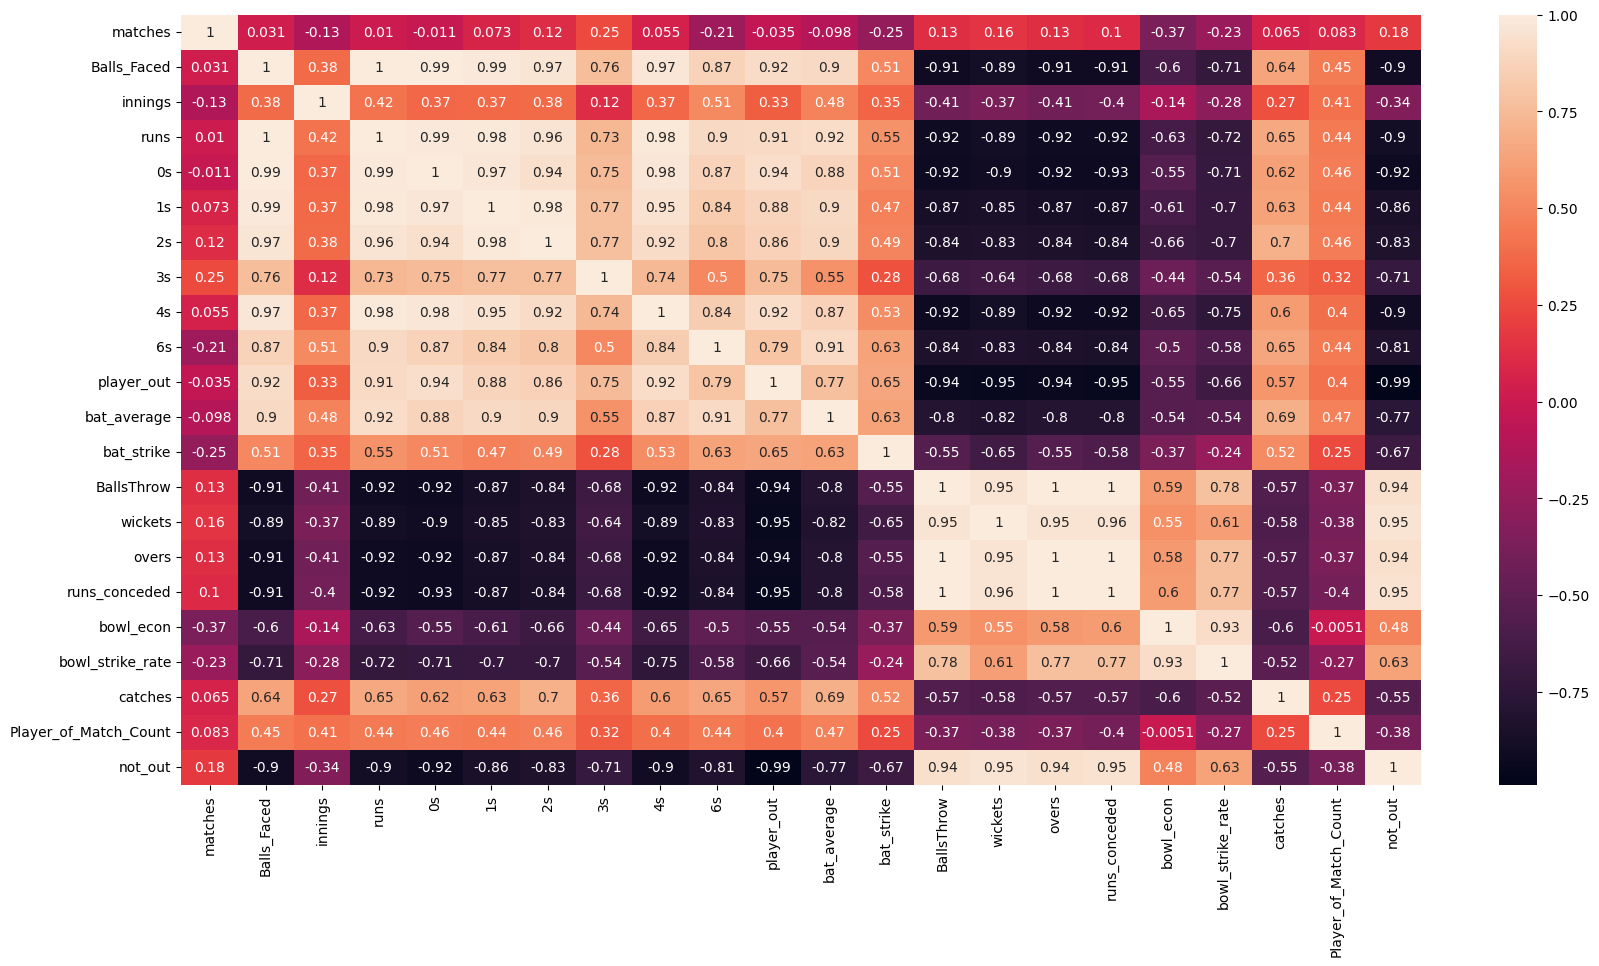

In [ ]:
# Let's Remove the Most Correlated Columns
plt.figure(figsize=(20,10))
sns.heatmap(final_df.corr(),annot=True)

In [ ]:
def correlation(data, threshold):
    corr_matrix = data.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Use bool instead of np.bool
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    return col_corr

In [ ]:
corr_cols = correlation(final_df,0.85)
corr_cols

['runs',
 '0s',
 '1s',
 '2s',
 '4s',
 '6s',
 'player_out',
 'bat_average',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out']

In [ ]:
top_columns =final_df.drop(['runs',
 '0s',
 '1s',
 '2s',
 '3s',
 '4s',
 '6s',
 'player_out',
 'wickets',
 'overs',
 'runs_conceded',
 'bowl_strike_rate',
 'not_out'],axis=1)

In [ ]:
final_df_new = top_columns[np.isfinite(top_columns).all(1)]
final_df_new.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match_Count
33.0,52.0,343.0,2.0,19.82,127.11,1119.0,6.81,28.0,7.0
35.0,57.0,1503.0,2.0,37.42,129.47,0.0,0.00,40.0,7.0
32.0,52.0,858.0,5.0,36.56,144.87,394.0,7.50,20.0,8.0
34.0,56.0,29.0,2.0,5.25,72.41,1369.0,6.79,8.0,7.0
144.0,54.0,120.0,2.0,11.91,109.17,1281.0,7.89,24.0,2.0


Splitting and Training the data

    ▪ 80% → Training Data

    ▪ 20% → Testing Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(final_df_new),
    columns=top_columns.columns,
    index=final_df_new.index
)
scaled_data.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match_Count
33.0,-1.142342,-0.798704,-0.593391,-0.421938,0.285853,0.976807,0.568964,0.386120,0.010834
35.0,0.788377,1.270138,-0.593391,0.998081,0.381497,-0.884490,-1.125797,1.465757,0.010834
32.0,-1.142342,0.119791,3.679023,0.928693,1.005618,-0.229128,0.740680,-0.333638,0.270861
34.0,0.402233,-1.358718,-0.593391,-1.597487,-1.930992,1.392646,0.563987,-1.413274,0.010834
144.0,-0.370054,-1.196421,-0.593391,-1.060139,-0.441208,1.246271,0.837737,0.026241,-1.289296


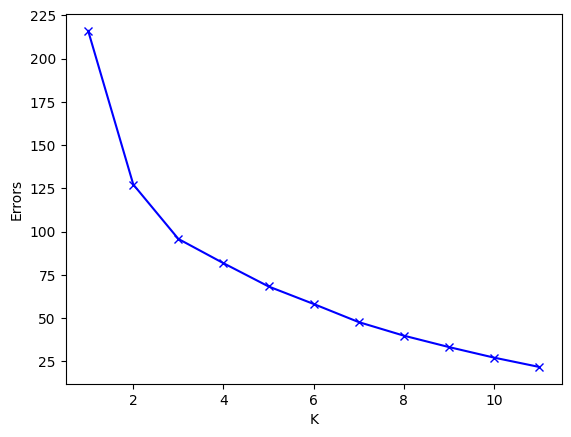

In [ ]:
clusters=range(1,12)
errors=[]
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    errors.append(model.inertia_)
plt.xlabel('K')
plt.ylabel('Errors')
plt.plot(clusters,errors,'bx-')
plt.show()

In [ ]:
model = KMeans(n_clusters = 4)
y_pred = model.fit_predict(scaled_data)
final_df_new['cluster'] = y_pred

final_df_new.head()

,matches,Balls_Faced,innings,bat_average,bat_strike,BallsThrow,bowl_econ,catches,Player_of_Match_Count,cluster
33.0,52.0,343.0,2.0,19.82,127.11,1119.0,6.81,28.0,7.0,0
35.0,57.0,1503.0,2.0,37.42,129.47,0.0,0.00,40.0,7.0,1
32.0,52.0,858.0,5.0,36.56,144.87,394.0,7.50,20.0,8.0,3
34.0,56.0,29.0,2.0,5.25,72.41,1369.0,6.79,8.0,7.0,2
144.0,54.0,120.0,2.0,11.91,109.17,1281.0,7.89,24.0,2.0,2


In [ ]:
final_df_new.reset_index(inplace=True)
topPlayers = final_df_new.rename(columns = {'index':'PlayerNames'})
topPlayers_cluster = pd.DataFrame(topPlayers[['PlayerNames','cluster']])

In [ ]:
topPlayers_cluster

,PlayerNames,cluster
0,33.0,0
1,35.0,1
2,32.0,3
3,34.0,2
4,144.0,2
5,36.0,1
6,79.0,2
7,18.0,1
8,142.0,2
9,54.0,0


In [ ]:
teams1 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==0]
teams1 = teams1['PlayerNames'].tolist()

teams2 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==1]
teams2 = teams2['PlayerNames'].tolist()

teams3 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==2]
teams3 = teams3['PlayerNames'].tolist()

teams4 = topPlayers_cluster.loc[topPlayers_cluster['cluster']==3]
teams4 = teams4['PlayerNames'].tolist()

In [ ]:
TopPlayer_Dataset = pd.DataFrame(teams1,columns=['teams1'])

In [ ]:
TopPlayer_Dataset['teams2']=pd.Series(teams2)
TopPlayer_Dataset['teams3']=pd.Series(teams3)
TopPlayer_Dataset['teams4']=pd.Series(teams4)
TopPlayer_Dataset = TopPlayer_Dataset.fillna('')

In [ ]:
TopPlayer_Dataset

,teams1,teams2,teams3,teams4
0,33.0,35.0,34.0,32.0
1,54.0,36.0,144.0,
2,137.0,18.0,79.0,
3,20.0,41.0,142.0,
4,3.0,39.0,71.0,
5,43.0,19.0,232.0,


In [ ]:
matches = pd.read_csv('/content/IPL_Matches_2008_2022.csv')
balls = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')


inningScores = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()
inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
10,335987,1,166
12,335988,1,142
14,335989,1,208
16,335990,1,214
18,335991,1,182


In [ ]:
inningScores['target'] = inningScores['total_run'] + 1
inningScores.head(10)

,ID,innings,total_run,target
0,335982,1,222,223
2,335983,1,240,241
4,335984,1,129,130
6,335985,1,165,166
8,335986,1,110,111
10,335987,1,166,167
12,335988,1,142,143
14,335989,1,208,209
16,335990,1,214,215
18,335991,1,182,183


In [ ]:
matches = matches.merge(inningScores[['ID','target']], on='ID')

matches['Team1'] = matches['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['Team2'] = matches['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

matches['Team1'] = matches['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['Team2'] = matches['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')

matches['Team1'] = matches['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['Team2'] = matches['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['Team2'] = matches['Team2'].str.replace('Pune Warriorss', 'Pune Warriors')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Pune Warriorss', 'Pune Warriors')

matches['Team1'] = matches['Team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['Team2'] = matches['Team2'].str.replace('Gujarat Lions', 'Gujarat Titans')
matches['WinningTeam'] = matches['WinningTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [ ]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad',
    'Delhi Capitals',
    'Chennai Super Kings',
    'Gujarat Titans',
    'Lucknow Super Giants',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Mumbai Indians'
]

In [ ]:
matches = matches[matches['Team1'].isin(teams2023)]
matches = matches[matches['Team2'].isin(teams2023)]
matches = matches[matches['WinningTeam'].isin(teams2023)]

matches['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [ ]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158


In [ ]:
matches.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin              14
method             843
Player_of_Match      0
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
target               0
dtype: int64

In [ ]:
matches = matches[['ID','City','Team1','Team2','WinningTeam','target']].dropna()
matches.head()

,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158


In [ ]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiant', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Rising Pune Supergiants', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Pune Warriorss', 'Pune Warriors')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Gujarat Lions', 'Gujarat Titans')

balls = balls[balls['BattingTeam'].isin(teams2023)]
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
final = matches.merge(balls, on='ID')
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
final = final[final['innings']==2]
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans


In [ ]:
final['current_score'] = final.groupby('ID')['total_run'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1


In [ ]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130


In [ ]:
final['balls_left'] = np.where(120 - final['overs']*6 - final['ballnumber']>=0,120 - final['overs']*6 - final['ballnumber'], 0)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115


In [ ]:
final['wickets_left'] = 10 - final.groupby('ID')['isWicketDelivery'].cumsum()
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10


In [ ]:
final['current_run_rate'] = (final['current_score']*6)/(120-final['balls_left'])
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

final['result'] = final.apply(result, axis=1)
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1


In [ ]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,1,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,119,10,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,2,WP Saha,TA Boult,Shubman Gill,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,0,131,118,10,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,3,WP Saha,TA Boult,Shubman Gill,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,117,10,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,4,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,116,10,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131,2,0,5,Shubman Gill,TA Boult,WP Saha,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,1,130,115,10,1.2,6.782609,1,Rajasthan Royals


In [ ]:
winningPred = final[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,119,10,0.0,6.605042,131,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131,118,10,0.0,6.661017,131,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,117,10,2.0,6.666667,131,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,116,10,1.5,6.724138,131,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130,115,10,1.2,6.782609,131,1


In [ ]:
winningPred.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
75206,Mumbai Indians,Kolkata Knight Riders,Mumbai,128,82,10,8.052632,9.365854,179,1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')

In [ ]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [ ]:
categorical_features=['BattingTeam', 'BowlingTeam', 'City']

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((92862, 9), (92862,))

Load the model

    ▪ We will fit the training data in2 the model

    ▪ and then web will transform the training data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Fit the model on the training data
model.fit(X_train, y_train, cat_features=categorical_features)

y_pred = model.predict(X_test)

0:	learn: 0.6575934	total: 87.1ms	remaining: 8.62s
1:	learn: 0.6285122	total: 120ms	remaining: 5.87s
2:	learn: 0.6042655	total: 160ms	remaining: 5.16s
3:	learn: 0.5838855	total: 196ms	remaining: 4.71s
4:	learn: 0.5666007	total: 228ms	remaining: 4.33s
5:	learn: 0.5516079	total: 264ms	remaining: 4.13s
6:	learn: 0.5382668	total: 300ms	remaining: 3.99s
7:	learn: 0.5266238	total: 335ms	remaining: 3.85s
8:	learn: 0.5164302	total: 369ms	remaining: 3.73s
9:	learn: 0.5078616	total: 400ms	remaining: 3.6s
10:	learn: 0.4994006	total: 432ms	remaining: 3.49s
11:	learn: 0.4926560	total: 464ms	remaining: 3.4s
12:	learn: 0.4861062	total: 498ms	remaining: 3.33s
13:	learn: 0.4807988	total: 532ms	remaining: 3.27s
14:	learn: 0.4757188	total: 563ms	remaining: 3.19s
15:	learn: 0.4698669	total: 595ms	remaining: 3.13s
16:	learn: 0.4648436	total: 631ms	remaining: 3.08s
17:	learn: 0.4603251	total: 663ms	remaining: 3.02s
18:	learn: 0.4561078	total: 695ms	remaining: 2.96s
19:	learn: 0.4514657	total: 725ms	remainin

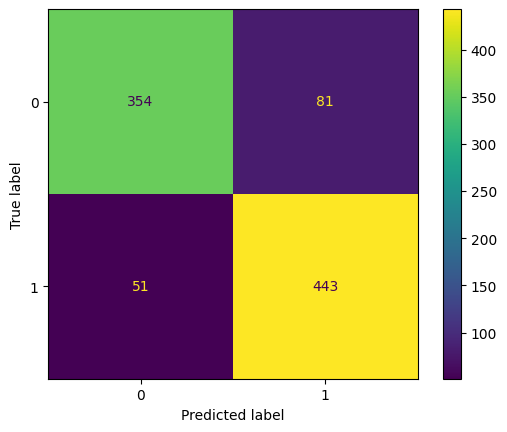

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

Evaluating the model

    ▪ If accuracy of model ≥ 75% : thn continue, if not change the algorithm

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred,pos_label=1)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred,pos_label=1)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred,pos_label=1)
print("F1 Score:", f1)

True Negative: 354
False Positive: 81
False Negative: 51
True Positive: 443
Accuracy: 0.8579117330462863
Precision: 0.8454198473282443
Recall: 0.8967611336032388
F1 Score: 0.8703339882121808


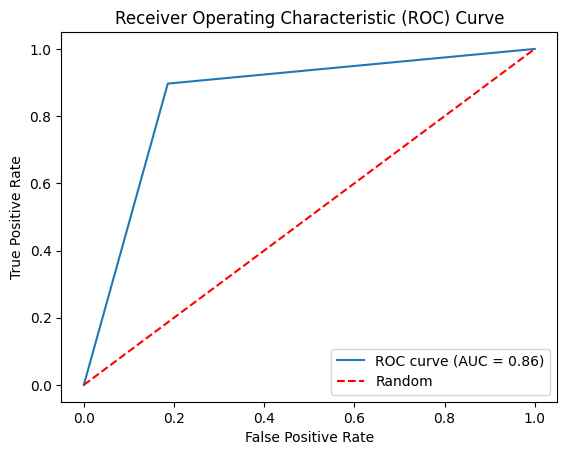

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
import pickle

with open('winner_prediction_catboost_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)

pickled_model = pickle.load(open('winner_prediction_catboost_classifier.pkl','rb'))

X['BowlingTeam'].unique()

X_test

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target
94634,Royal Challengers Bangalore,Delhi Capitals,Delhi,78,108,10,9.000000,4.333333,96
8396,Gujarat Titans,Sunrisers Hyderabad,Mumbai,127,74,9,9.000000,10.297297,196
19141,Royal Challengers Bangalore,Delhi Capitals,Dubai,26,15,7,7.942857,10.400000,165
80466,Punjab Kings,Royal Challengers Bangalore,Chandigarh,23,10,6,8.345455,13.800000,176
40225,Delhi Capitals,Chennai Super Kings,Chennai,95,49,3,7.183099,11.632653,180
...,...,...,...,...,...,...,...,...,...
188986,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,159,97,9,5.217391,9.835052,179
9227,Mumbai Indians,Lucknow Super Giants,Mumbai,38,4,4,6.775862,57.000000,169
168146,Chennai Super Kings,Mumbai Indians,Port Elizabeth,95,63,8,5.578947,9.047619,148
12500,Mumbai Indians,Punjab Kings,Pune,88,59,8,10.918033,8.949153,199


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',RandomForestClassifier())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

pipe.predict_proba(X_test)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       ...,
       [0.01, 0.99],
       [0.81, 0.19],
       [0.04, 0.96]])

In [ ]:
l = [['Royal Challengers Bangalore', 'Mumbai Indians', 'Mumbai', 108, 49, 6 ,10, 6.5, 200]]
columns = ['BattingTeam', 'BowlingTeam', 'City', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team2023 = pd.DataFrame(l,columns=columns)

pipe.predict_proba(team2023)

array([[0.56, 0.44]])